In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('flights.csv', low_memory = False)

In [3]:
flight_data = data.head(100000)

In [4]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   FLIGHT_NUMBER        100000 non-null  int64  
 6   TAIL_NUMBER          99833 non-null   object 
 7   ORIGIN_AIRPORT       100000 non-null  object 
 8   DESTINATION_AIRPORT  100000 non-null  object 
 9   SCHEDULED_DEPARTURE  100000 non-null  int64  
 10  DEPARTURE_TIME       97702 non-null   float64
 11  DEPARTURE_DELAY      97702 non-null   float64
 12  TAXI_OUT             97629 non-null   float64
 13  WHEELS_OFF           97629 non-null   float64
 14  SCHEDULED_TIME       100000 non-null  float64
 15  ELAPSED_TIME      

In [5]:
flight_data.sample(20)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
77614,2015,1,5,1,AA,1386,N558AA,DFW,MCO,2015,...,36.0,61.0,0,0,NaN,4.0,0.0,34.0,23.0,0.0
6261,2015,1,1,4,US,1882,N806AW,CLT,CLE,1310,...,1512.0,23.0,0,0,NaN,0.0,0.0,23.0,0.0,0.0
27560,2015,1,2,5,EV,4736,N11536,CLE,EWR,1839,...,1956.0,-29.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
59464,2015,1,4,7,AS,551,N611AS,PSP,SEA,1845,...,2126.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
97177,2015,1,7,3,EV,5401,N923EV,ATL,CAE,815,...,922.0,12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
83410,2015,1,6,2,AS,764,N536AS,PDX,DCA,950,...,1802.0,22.0,0,0,NaN,22.0,0.0,0.0,0.0,0.0
88659,2015,1,6,2,DL,1724,N995DL,ATL,BDL,1515,...,1731.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
27997,2015,1,2,5,WN,2788,N508SW,AMA,DAL,1905,...,2048.0,38.0,0,0,NaN,5.0,0.0,0.0,33.0,0.0
821,2015,1,1,4,UA,821,N490UA,RDU,SFO,657,...,953.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
66297,2015,1,5,1,AS,383,N626AS,SFO,PDX,900,...,1039.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
flight_data.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER              167
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          2298
DEPARTURE_DELAY         2298
TAXI_OUT                2371
WHEELS_OFF              2371
SCHEDULED_TIME             0
ELAPSED_TIME            2613
AIR_TIME                2613
DISTANCE                   0
WHEELS_ON               2440
TAXI_IN                 2440
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            2440
ARRIVAL_DELAY           2613
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    97611
AIR_SYSTEM_DELAY       65375
SECURITY_DELAY         65375
AIRLINE_DELAY          65375
LATE_AIRCRAFT_DELAY    65375
WEATHER_DELAY          65375
dtype: int64

In [7]:
flight_data['DIVERTED'].value_counts()

0    99776
1      224
Name: DIVERTED, dtype: int64

#### [Question 1] The number of flights Diverted is 224.

### Pearson correlation 

In [8]:
corr = flight_data.corr()

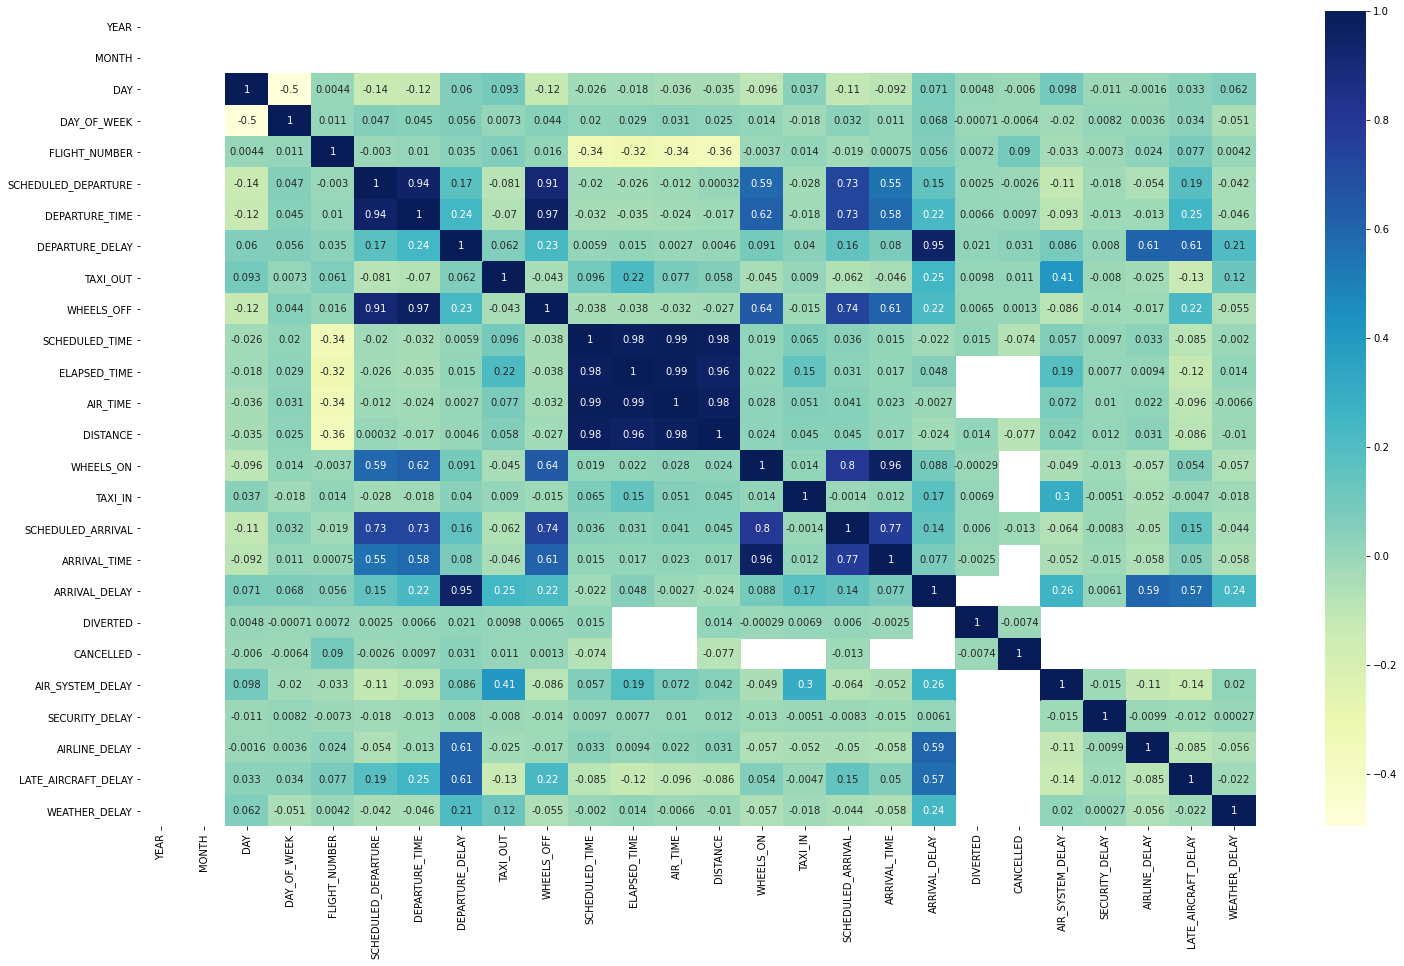

In [9]:
plt.figure(figsize = (25,15))
sns.heatmap(corr, cmap = 'YlGnBu', annot = True)
plt.show()

In [10]:
df = flight_data.drop(['YEAR', 'FLIGHT_NUMBER', 'AIRLINE', 'DISTANCE', 'TAIL_NUMBER', 'TAXI_OUT', 'SCHEDULED_TIME', 'DEPARTURE_TIME', 'WHEELS_OFF', 'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'DAY_OF_WEEK', 'TAXI_IN', 'ARRIVAL_TIME', 'CANCELLATION_REASON'], axis = 1)

In [11]:
df.head(10)

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,ANC,SEA,5,-11.0,430,-22.0,0,0,NaN,NaN,NaN,NaN,NaN
1,1,1,LAX,PBI,10,-8.0,750,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
2,1,1,SFO,CLT,20,-2.0,806,5.0,0,0,NaN,NaN,NaN,NaN,NaN
3,1,1,LAX,MIA,20,-5.0,805,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
4,1,1,SEA,ANC,25,-1.0,320,-21.0,0,0,NaN,NaN,NaN,NaN,NaN
5,1,1,SFO,MSP,25,-5.0,602,8.0,0,0,NaN,NaN,NaN,NaN,NaN
6,1,1,LAS,MSP,25,-6.0,526,-17.0,0,0,NaN,NaN,NaN,NaN,NaN
7,1,1,LAX,CLT,30,14.0,803,-10.0,0,0,NaN,NaN,NaN,NaN,NaN
8,1,1,SFO,DFW,30,-11.0,545,-13.0,0,0,NaN,NaN,NaN,NaN,NaN
9,1,1,LAS,ATL,30,3.0,711,-15.0,0,0,NaN,NaN,NaN,NaN,NaN


In [12]:
df.isnull().sum()

MONTH                      0
DAY                        0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_DELAY         2298
SCHEDULED_ARRIVAL          0
ARRIVAL_DELAY           2613
DIVERTED                   0
CANCELLED                  0
AIR_SYSTEM_DELAY       65375
SECURITY_DELAY         65375
AIRLINE_DELAY          65375
LATE_AIRCRAFT_DELAY    65375
WEATHER_DELAY          65375
dtype: int64

In [13]:
df.describe()

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,100000.0,100000.000000,100000.000000,97702.000000,100000.000000,97387.000000,100000.000000,100000.000000,34625.000000,34625.000000,34625.000000,34625.000000,34625.000000
mean,1.0,3.733920,1306.348280,19.937749,1481.115620,18.342304,0.002240,0.023890,14.026801,0.070787,17.853921,26.014556,2.751971
std,0.0,1.815542,482.325506,45.843577,498.916358,48.878234,0.047276,0.152707,25.965405,1.692526,43.527539,42.593343,17.265760
min,1.0,1.000000,5.000000,-39.000000,1.000000,-65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,2.000000,904.000000,-3.000000,1100.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,4.000000,1300.000000,3.000000,1500.000000,4.000000,0.000000,0.000000,4.000000,0.000000,4.000000,10.000000,0.000000
75%,1.0,5.000000,1720.000000,25.000000,1908.000000,27.000000,0.000000,0.000000,19.000000,0.000000,19.000000,35.000000,0.000000
max,1.0,7.000000,2359.000000,1380.000000,2359.000000,1384.000000,1.000000,1.000000,590.000000,107.000000,1380.000000,891.000000,562.000000


In [14]:
df = df.fillna(df.mean())

In [15]:
df.isnull().sum()

MONTH                  0
DAY                    0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_DELAY        0
SCHEDULED_ARRIVAL      0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [16]:
result = []
for i in df['ARRIVAL_DELAY']:
    if i > 15 :
        result.append(1)
    else:
        result.append(0)

In [17]:
df['result'] = result

In [18]:
df['result'].value_counts()

0    63779
1    36221
Name: result, dtype: int64

In [19]:
features  = df.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_DELAY', 'result'], axis = 1)
target = df['result']

In [20]:
x = features
y = target

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [23]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
trained = clf.fit(x_train,y_train)
trained

DecisionTreeClassifier()

In [25]:
test = clf.predict(x_test)
test

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [26]:
from sklearn.metrics import roc_auc_score
print('roc auc score : ', roc_auc_score(y_test, test))

roc auc score :  0.993490823648949


In [ ]:
#task 6 

#(roc auc score : 0.9934908)

Text(0.5, 0, 'Delay')

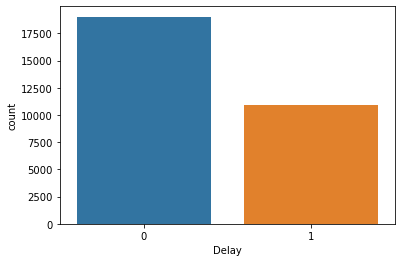

In [33]:
sns.countplot(test)
plt.xlabel('Delay')